In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm
from IPython.display import clear_output

tqdm.pandas()
pd.options.display.max_colwidth = -1
pd.options.display.max_columns = 25

In [3]:
from dsutils.eda import *
from dsutils.stats import *
from dsutils.ml import *

In [4]:
data = pd.read_csv('train_cleaned.csv')

In [5]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio,q1_clean,q2_clean
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,11,0.846154,step step guide invest share market india,step step guide invest share market
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,4,0.380952,story kohinoor koh noor diamond,would happen indian government stole kohinoor koh noor diamond back
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,3,0.250000,increase speed internet connection using vpn,internet speed increased hacking dns
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,0,0.000000,mentally lonely solve,find remainder math 23 24 math divided 24 23
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,2,0.200000,one dissolve water quikly sugar salt methane carbon di oxide,fish would survive salt water


___
<center><b>abs_word_diff</b>: absolute difference between number of words in question1 and question2</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  1.0   1.0   3.0   13.0  91   2.32  2.91
1        0    0.0  0.0   1.0   2.0   6.0   23   1.20  1.43
overall  0    0.0  0.0   1.0   2.0   11.0  91   1.91  2.52


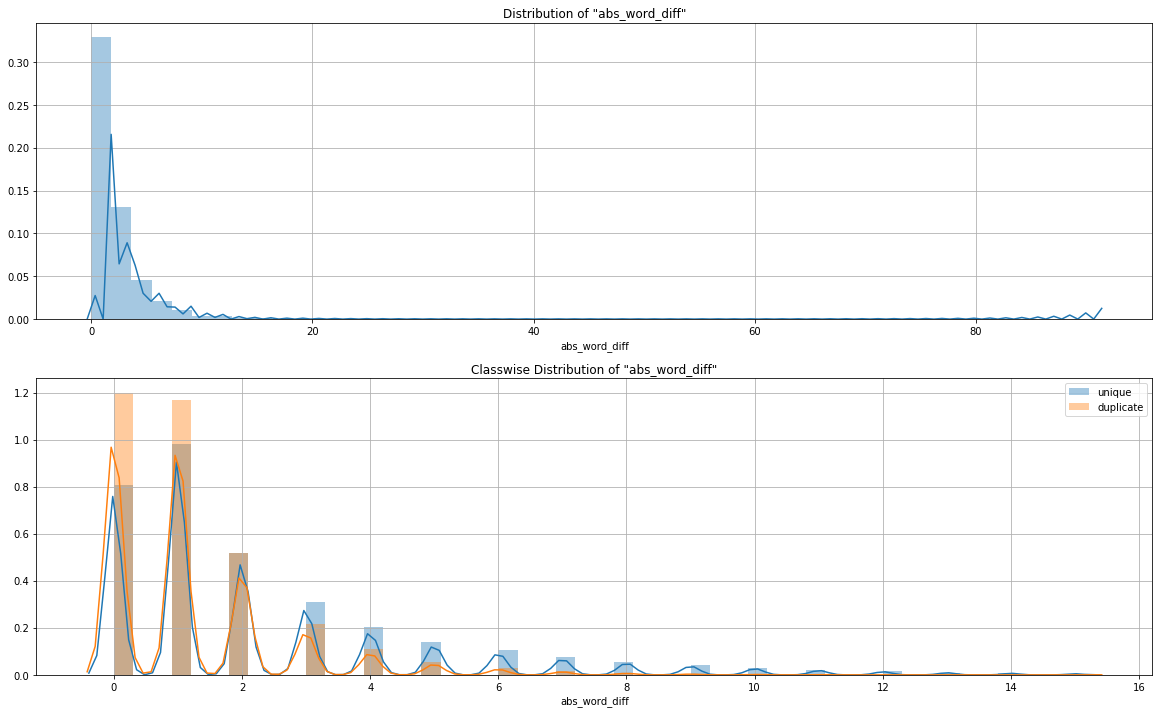

In [6]:
data['abs_word_diff'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: abs(len(str(row['q1_clean']).split())-len(str(row['q2_clean']).split())),
    axis=1
)

print(feature_distribution(data, 'abs_word_diff', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'abs_word_diff', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=15)

___
<center><b>avg_num_word</b>: average number of words present in the questions</center>


         min  1st  25th  50th  75th  99th   max  mean   std
0        1.0  1.5  4.0   5.5   7.5   15.5  59.5  6.00  2.99
1        1.0  2.0  3.5   4.5   6.0   12.0  44.0  4.87  2.18
overall  1.0  1.5  3.5   5.0   7.0   15.0  60.0  5.58  2.77


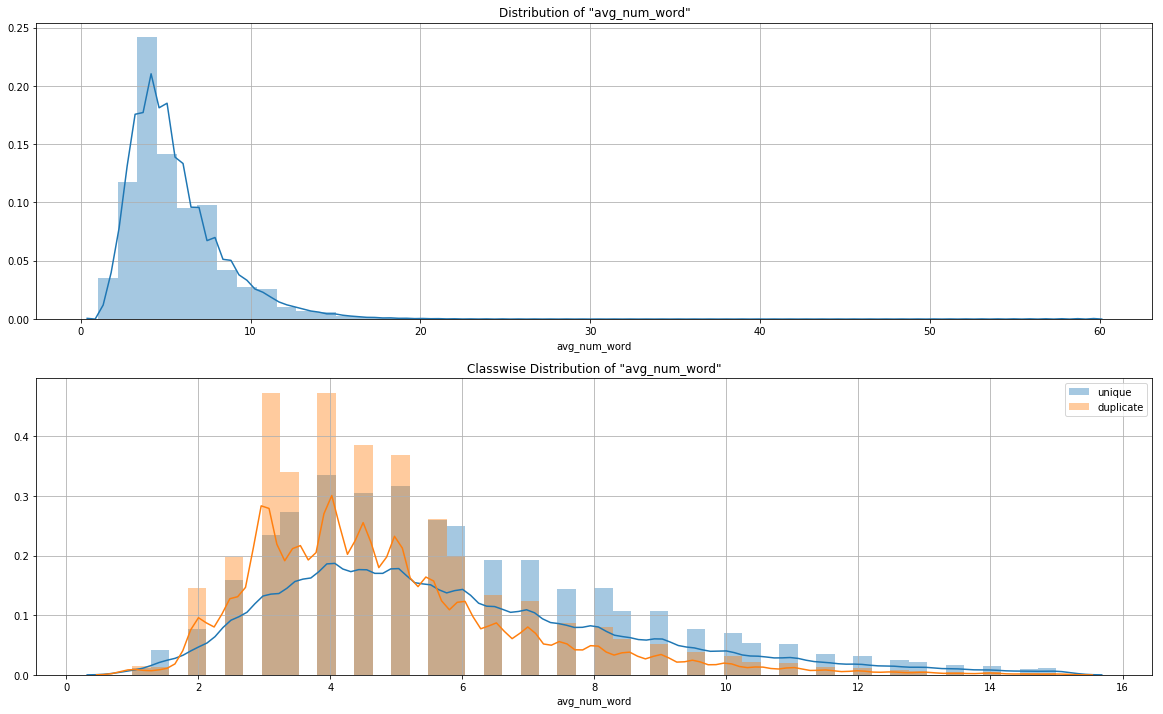

In [7]:
data['avg_num_word'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: (len(str(row['q1_clean']).split())+len(str(row['q2_clean']).split()))/2,
    axis=1
)

print(feature_distribution(data, 'avg_num_word', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'avg_num_word', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=15)

___
<center><b>rel_word_diff</b>: abs_word_diff / avg_num_word </center>


         min  1st  25th  50th  75th  99th   max  mean   std
0        0.0  0.0  0.1   0.29  0.55  1.29  1.85  0.36  0.32
1        0.0  0.0  0.0   0.22  0.40  0.93  1.50  0.24  0.24
overall  0.0  0.0  0.0   0.29  0.50  1.20  2.00  0.31  0.30


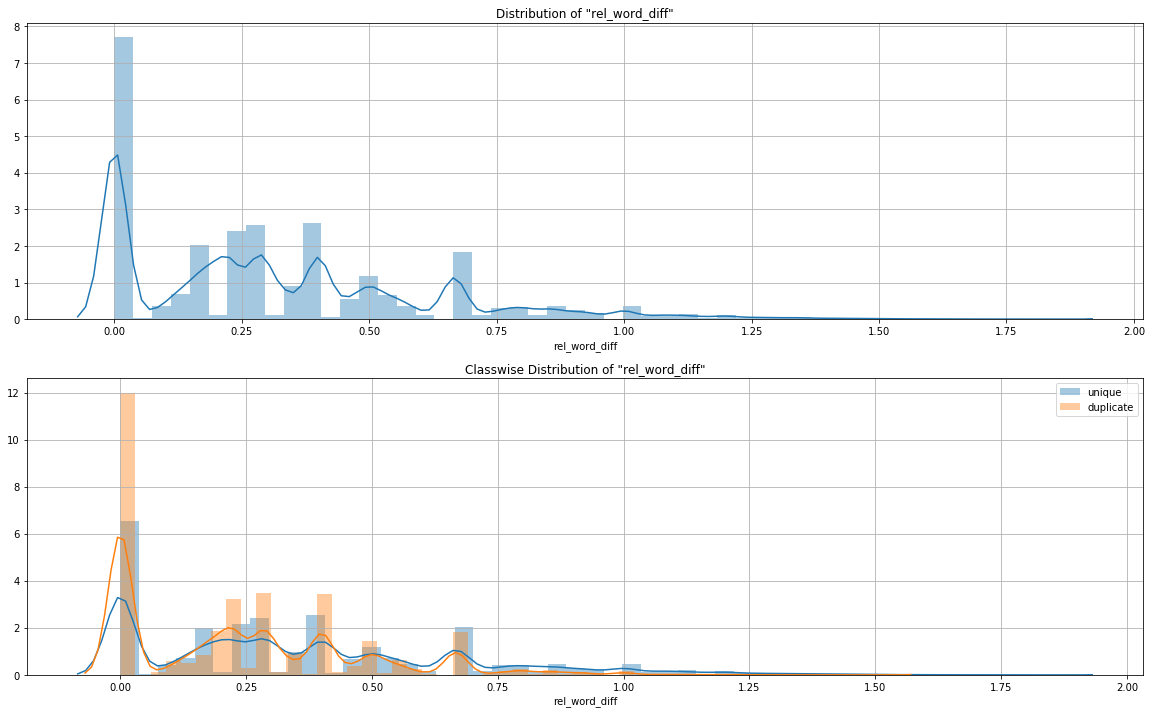

In [8]:
data['rel_word_diff'] = data[['abs_word_diff', 'avg_num_word']].progress_apply(
    lambda row: row['abs_word_diff']/row['avg_num_word'],
    axis=1
)

print(feature_distribution(data, 'rel_word_diff', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'rel_word_diff', 'is_duplicate', labels=['unique', 'duplicate'])

___
<center><b>word_intersection</b>:  number of unique words common to question1 and question2</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  1.0   2.0   3.0   8.0   20   2.19  1.75
1        0    1.0  2.0   3.0   4.0   8.0   24   3.07  1.49
overall  0    0.0  2.0   2.0   3.0   8.0   24   2.52  1.71


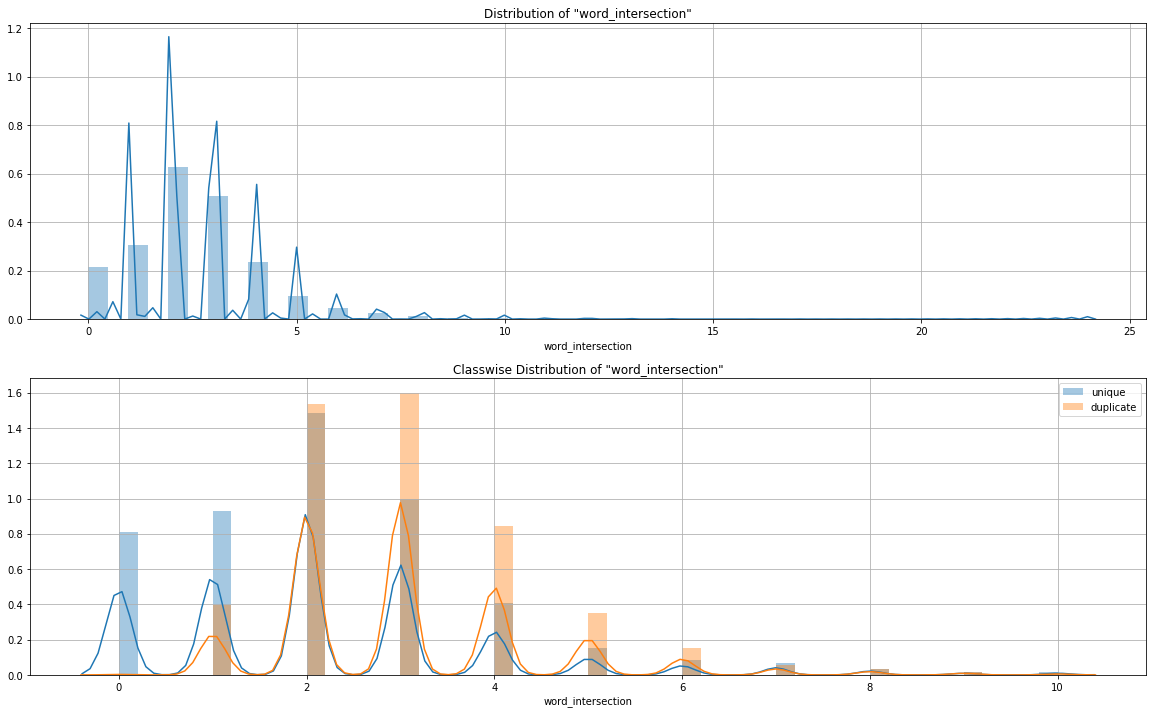

In [9]:
data['word_intersection'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: len(set(str(row['q1_clean']).split())&set(str(row['q2_clean']).split())),
    axis=1
)

print(feature_distribution(data, 'word_intersection', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'word_intersection', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=10)

___
<center><b>word_union</b>: number of unique words in question1 and question2 combined</center>


         min  1st  25th  50th  75th  99th  max  mean   std
0        1    2.0  6.0   8.0   12.0  26.0  96   9.41  5.22
1        1    2.0  4.0   6.0   8.0   17.0  54   6.46  3.10
overall  1    2.0  5.0   7.0   10.0  24.0  96   8.32  4.77


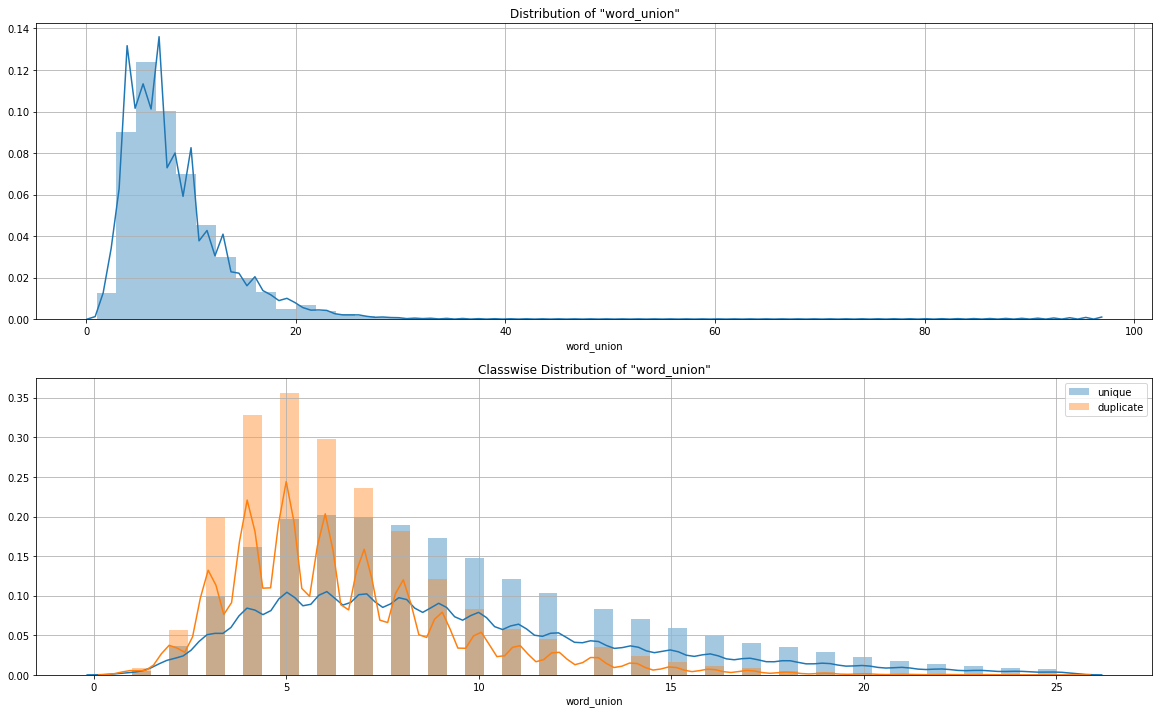

In [10]:
data['word_union'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: len(set(str(row['q1_clean']).split())|set(str(row['q2_clean']).split())),
    axis=1
)

print(feature_distribution(data, 'word_union', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'word_union', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=25)

___
<center><b>jaccard_similarity_word</b>: word_intersection / word_union </center>


         min   1st  25th  50th  75th  99th  max  mean   std
0        0.0  0.00  0.11  0.25  0.50  1.0   1.0  0.31  0.25
1        0.0  0.17  0.33  0.50  0.67  1.0   1.0  0.53  0.24
overall  0.0  0.00  0.18  0.33  0.57  1.0   1.0  0.39  0.27


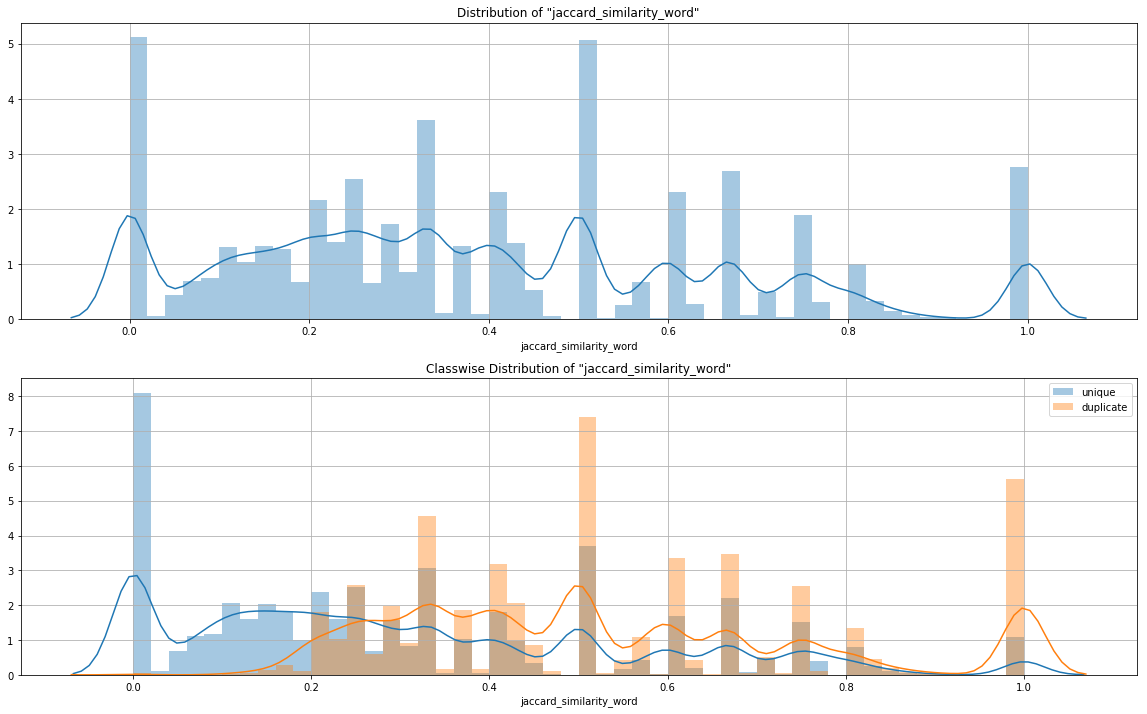

In [11]:
data['jaccard_similarity_word'] = data[['word_intersection', 'word_union']].progress_apply(
    lambda row: row['word_intersection']/row['word_union'],
    axis=1
)

print(feature_distribution(data, 'jaccard_similarity_word', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'jaccard_similarity_word', 'is_duplicate', labels=['unique', 'duplicate'])

<center><b>lcs_word</b>: length of longest common subsequence of words</center>

In [12]:
def lcs(X , Y): 
    m = len(X) 
    n = len(Y) 

    L = [[None]*(n+1) for i in range(m+1)] 
  
    for i in range(m+1): 
        for j in range(n+1): 
            if i == 0 or j == 0 : 
                L[i][j] = 0
            elif X[i-1] == Y[j-1]: 
                L[i][j] = L[i-1][j-1]+1
            else: 
                L[i][j] = max(L[i-1][j] , L[i][j-1]) 
  
    return L[m][n] 


         min  1st  25th  50th  75th  99th  max  mean   std
0        0    0.0  1.0   2.0   3.0   8.0   27   2.05  1.76
1        0    1.0  2.0   3.0   3.0   8.0   29   2.94  1.51
overall  0    0.0  1.0   2.0   3.0   8.0   29   2.38  1.73


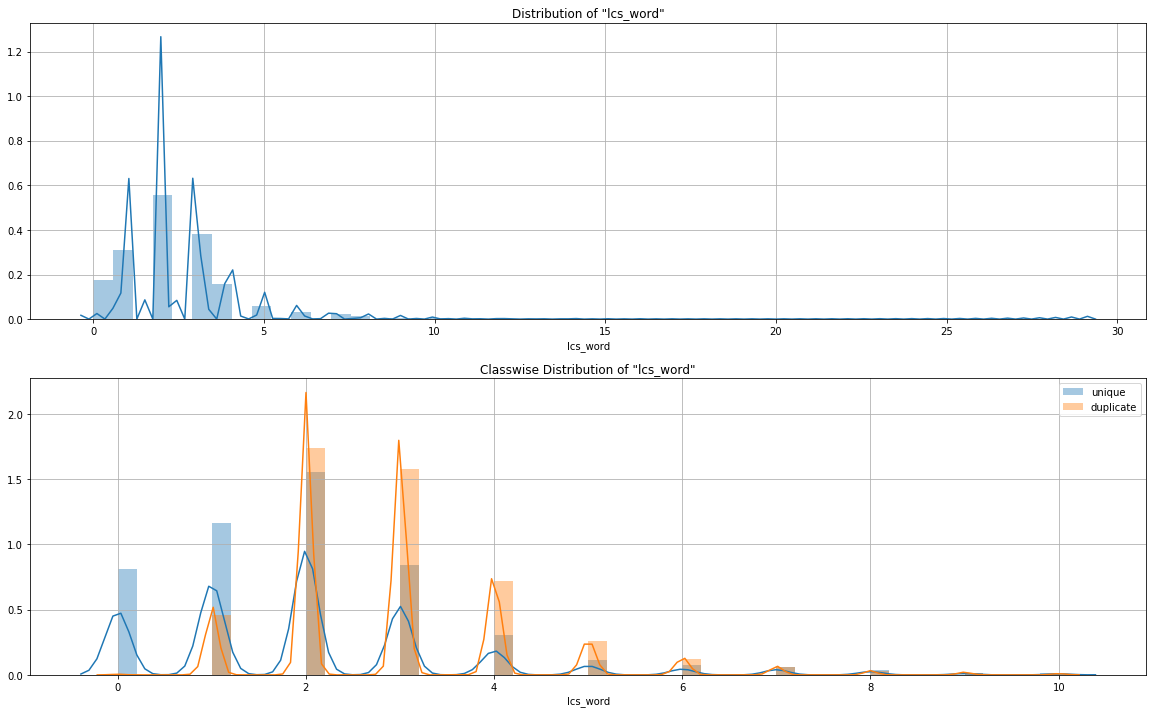

In [13]:
data['lcs_word'] = data[['q1_clean', 'q2_clean']].progress_apply(
    lambda row: lcs(str(row['q1_clean']).split(), str(row['q2_clean']).split()),
    axis=1
)

print(feature_distribution(data, 'lcs_word', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'lcs_word', 'is_duplicate', labels=['unique', 'duplicate'], uthreshold=10)

<center><b>lcs_word_ratio</b>: lcs_word / avg_num_word</center>


         min   1st  25th  50th  75th  99th  max  mean   std
0        0.0  0.00  0.17  0.33  0.60  1.0   1.0  0.39  0.28
1        0.0  0.22  0.46  0.62  0.80  1.0   1.0  0.63  0.20
overall  0.0  0.00  0.26  0.50  0.67  1.0   1.0  0.47  0.28


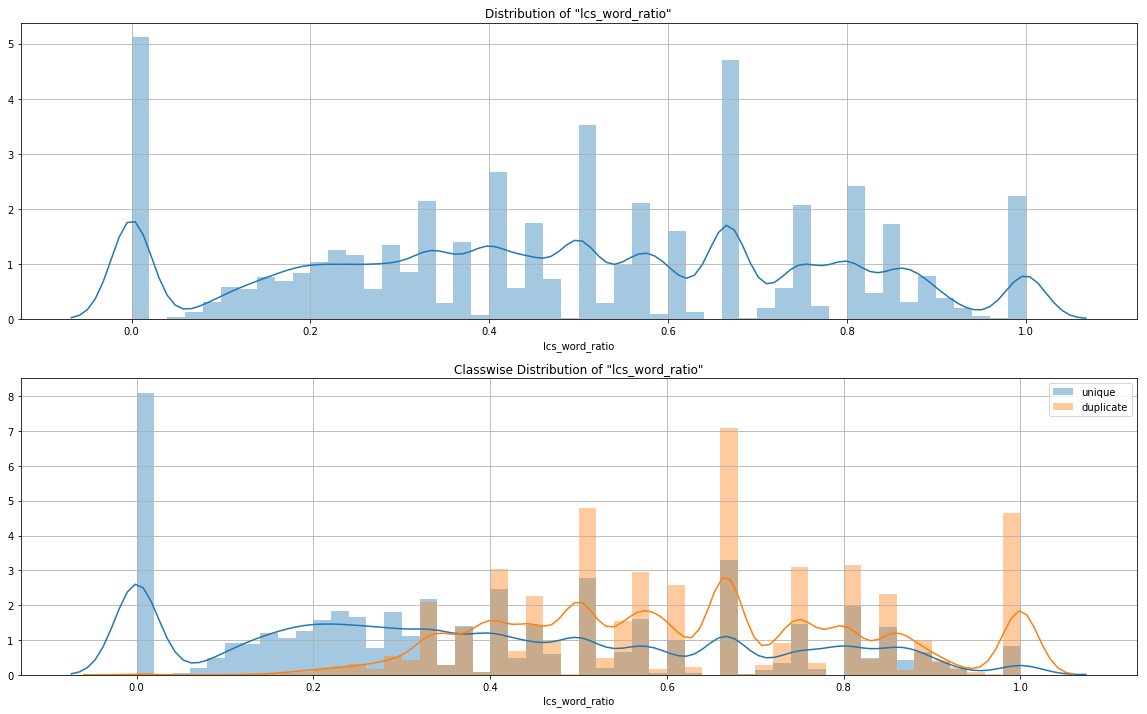

In [14]:
data['lcs_word_ratio'] = data[['lcs_word', 'avg_num_word']].progress_apply(
    lambda row: row['lcs_word']/row['avg_num_word'],
    axis=1
)

print(feature_distribution(data, 'lcs_word_ratio', 'is_duplicate'))
fig, ax = plot_feature_distribution(data, 'lcs_word_ratio', 'is_duplicate', labels=['unique', 'duplicate'])

In [15]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,abs_token_diff,avg_num_token,rel_token_diff,token_intersection,token_union,jaccard_similarity_token,lcs_token,lcs_token_ratio,q1_clean,q2_clean,abs_word_diff,avg_num_word,rel_word_diff,word_intersection,word_union,jaccard_similarity_word,lcs_word,lcs_word_ratio
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,2,13.0,0.153846,10,13,0.769231,11,0.846154,step step guide invest share market india,step step guide invest share market,1,6.5,0.153846,5,6,0.833333,6,0.923077
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,5,10.5,0.476190,4,16,0.250000,4,0.380952,story kohinoor koh noor diamond,would happen indian government stole kohinoor koh noor diamond back,5,7.5,0.666667,4,11,0.363636,4,0.533333
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,4,12.0,0.333333,3,21,0.142857,3,0.250000,increase speed internet connection using vpn,internet speed increased hacking dns,1,5.5,0.181818,2,9,0.222222,1,0.181818
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,2,10.0,0.200000,0,19,0.000000,0,0.000000,mentally lonely solve,find remainder math 23 24 math divided 24 23,6,6.0,1.000000,0,9,0.000000,0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,6,10.0,0.600000,2,18,0.111111,2,0.200000,one dissolve water quikly sugar salt methane carbon di oxide,fish would survive salt water,5,7.5,0.666667,2,13,0.153846,1,0.133333


In [16]:
feats = ['abs_token_diff', 'avg_num_token', 'rel_token_diff', 
         'token_intersection', 'token_union', 'jaccard_similarity_token',
         'lcs_token', 'lcs_token_ratio',
         'abs_word_diff', 'avg_num_word', 'rel_word_diff',
         'word_intersection', 'word_union', 'jaccard_similarity_word',
         'lcs_word', 'lcs_word_ratio'
]
pbc = []
for feat in feats:
    pbc.append(point_biserial_correlation('is_duplicate', feat, data))

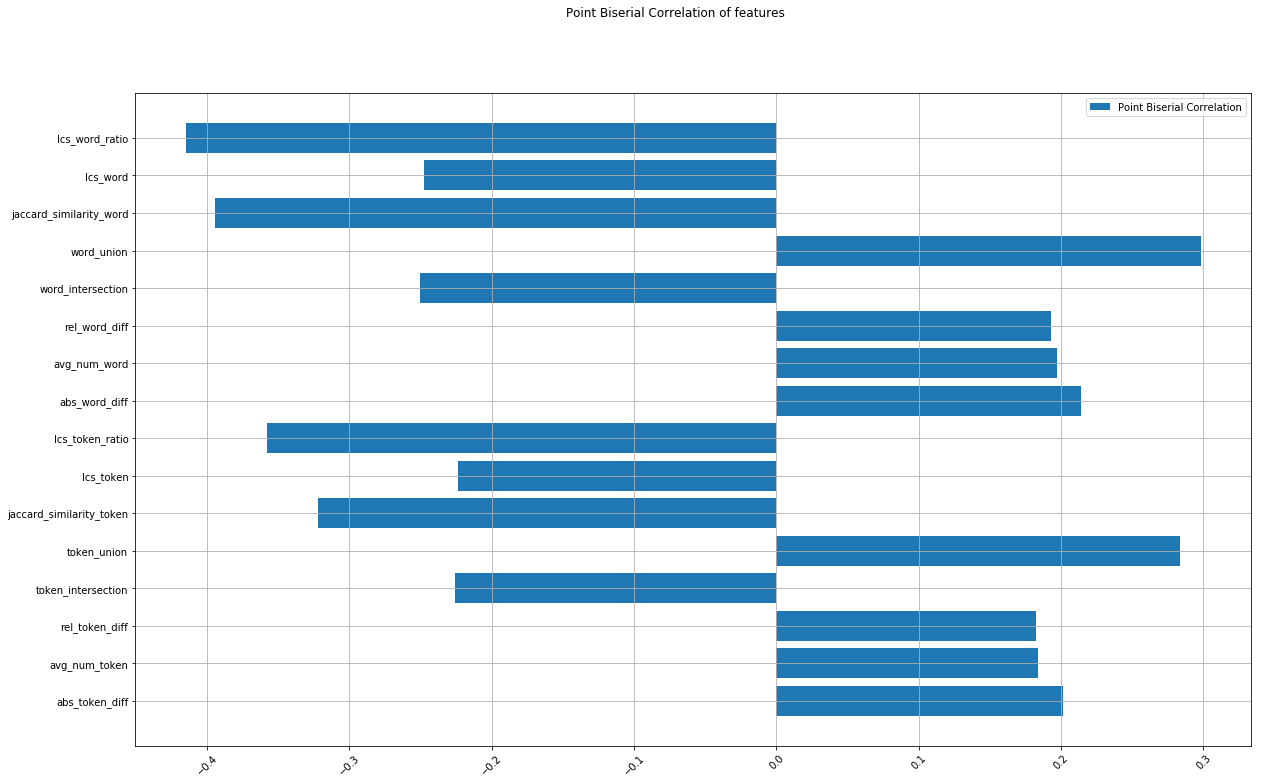

In [17]:
fig, ax = plt.subplots(figsize=(20, 12))
fig.suptitle('Point Biserial Correlation of features')
plt.barh(y=feats, width=pbc)
ax.grid()
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.legend(['Point Biserial Correlation'])

# Model Fitting

In [18]:
from sklearn.linear_model import LogisticRegression

Mean Loss 0.529259335990574 +- 0.0022270412372793927


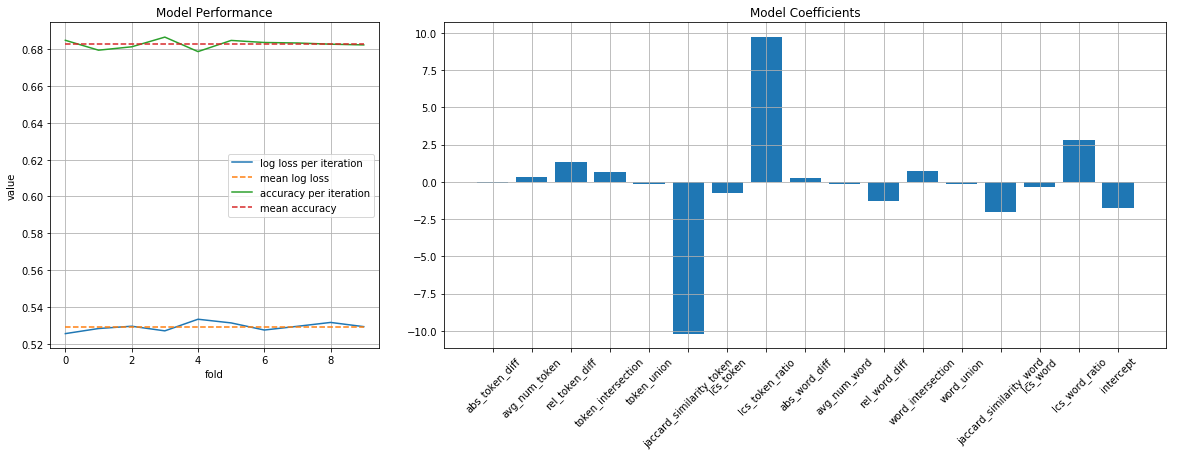

In [19]:
model = LogisticRegression()
lr_performance, lr_model = train_model(model, data, feats, 'is_duplicate')
print('Mean Loss', np.mean(lr_performance['log loss']), '+-', np.std(lr_performance['log loss']))

In [20]:
data.to_csv('basic_features_clean.csv', index=False)